# Measurements and their Uncertainties
 
## Summative exercise

Each question has the same marks. 


## 1. Linear regression [10 marks]

Data  collected in an experiment to measure the speed of light  are listed below.
\begin{array}{lccccc}
\hline
{\rm displacement (m)} &0.05&0.25&0.45&0.65&0.85\\
{\rm phase (rad)} &0.00&0.21&0.44&0.67&0.88\\
{\rm error (rad)}   &0.05&0.05&0.05&0.05&0.09\\
\hline
{\rm displacement (m)} &1.05&1.25&1.45&1.65&1.85\\
{\rm phase (rad)} &1.1&1.3&1.5&2.0&2.24\\
{\rm error (rad)}   &0.1&0.2&0.5&0.1&0.07\\
\hline
\end{array} 


The speed of light is related to the slope of this graph via the relationship

$${\displaystyle\textrm{speed of light}=\frac{2\pi\times 60\times10^{6}}{\textrm{slope}}\textrm{Hz}}$$

> (i)  Calculate the  slope and intercept of the best-fit straight line to the data, and their associated errors.  
<bf>
> (ii) Hence deduce the speed of light, and its error.
<bf>
> (iii) The theoretical predication is that the intercept should be zero.  Is this consistent with the data?

In [1]:
%matplotlib nbagg
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
data = pd.read_csv('/data/speed.csv')
displacement = np.array(data.iloc[:,0])
phase = np.array(data.iloc[:,1])
phase_error = data.iloc[:,2]

# Note throughout this whole notebook I use minimise function over curvefit, I have checked answers and I believe the minimise fuction is more reliable and accurate but I did find when comparing the two 'fitting' functions the errors on the parameters differered by a small amount. 

# Please Note throughout the notebook I use the Hessian matrix from minimise function, It is advised in the Hughes and Hayes book, The factor of two comes into play when calculating uncertainties (P 75 in book). this is due to the curvature matrix being equal to one half of the hessian.

# (i)

In [3]:
def chisqfunc(x):
    'Linear chi squared fitting function'
    a,b = x
    model = a + b*displacement
    chisq = np.sum(((phase - model)/phase_error)**2)
    return chisq

# Set starting position from which to minimize
x0 = np.array([0,0])

# Use scipy.optimize.minimize
result =  minimize(chisqfunc, x0)
intercept, gradient = result.x
intercept_error = np.sqrt(2*result.hess_inv[0][0]) #In the book it says I need to account for factor of 2 
gradient_error = np.sqrt(2*result.hess_inv[1][1])


print('Gradient = ',gradient, 'rad/m',
      '\nGradient error =', gradient_error, 'rad/m',
      '\nIntercept = ',intercept, 'rad',
      '\nIntercept error', intercept_error, 'rad',
      '\n\nMy Answer -> Rounded Gradient and error:',
      '\n\nGradient (round) = ', round(gradient,3),'rad/m',
      '\nGradient error (round)', round(gradient_error,2), 'rad/m',
     '\nIntercept (round) = ',round(intercept,2), 'rad',
      '\nIntercept error (round)', round(intercept_error,2),'rad')

Gradient =  1.2397219647505449 rad/m 
Gradient error = 0.0392500537168042 rad/m 
Intercept =  -0.10700884519557129 rad 
Intercept error 0.032665141096055186 rad 

My Answer -> Rounded Gradient and error: 

Gradient (round) =  1.24 rad/m 
Gradient error (round) 0.04 rad/m 
Intercept (round) =  -0.11 rad 
Intercept error (round) 0.03 rad


# (ii)

In [4]:
def speed_light(gradient):
    return (2*np.pi*60*10**6)/gradient


error_c = abs( speed_light(gradient + gradient_error) - speed_light(gradient) )

speed_of_light = speed_light(gradient)

speed_round = '%.2E' % speed_of_light
error_round = '%.0E' % error_c


print('Speed of light = ' ,speed_of_light,'m/s ',
      '\nError on the speed of light = ',error_c,'m/s',
      '\n\nMy Answer -> Rounded values: ',
      '\n\nSpeed of light (round) = ' ,speed_round,'m/s',
      '\nError on the speed of light (round) = ', error_round,'m/s')


Speed of light =  304093279.9046057 m/s  
Error on the speed of light =  9332242.925437868 m/s 

My Answer -> Rounded values:  

Speed of light (round) =  3.04E+08 m/s 
Error on the speed of light (round) =  9E+06 m/s


# (iii)

In [5]:
def chisqfunc(x):

    a,b = x
    model = displacement*a +b
    chisq = np.sum((( phase - model)/phase_error)**2)
    return chisq


x0 = np.array([1,1])


result =  minimize(chisqfunc, x0)
a,b=result.x

x = (a,b)

c_upper = intercept + intercept_error
c_lower = intercept - intercept_error

print('Intercept range from ', np.round(c_lower,2),'rad to ', np.round(c_upper,2),'rad')

print('chi min = ',chisqfunc(x))
DOF = 10-2
print('P value = ', chi2.sf(chisqfunc(x),DOF))
print('\nMy Answer -> Rounded values:')
print('chi min = ',np.round(chisqfunc(x),2))

print('P value = ', np.round(chi2.sf(chisqfunc(x),DOF),2))

print('\nNo it is not, The zero value of the y axis is not within the range of the intecept and its respective errors.\
Therefore the theoretical prediction is not consitent with the data.\n\n')

print('\nNote:The p value is close to 1 and the minimised chi not roughly equal to the DOF suggesting our model may not be reasonable. Which would explain why our intercept does not agree with the theoretical predictions. Another possible reason would be that the measurements/uncertainties we took have some underlying errors in them.')


Intercept range from  -0.14 rad to  -0.07 rad
chi min =  4.273489573310938
P value =  0.8316437543246618

My Answer -> Rounded values:
chi min =  4.27
P value =  0.83

No it is not, The zero value of the y axis is not within the range of the intecept and its respective errors.Therefore the theoretical prediction is not consitent with the data.



Note:The p value is close to 1 and the minimised chi not roughly equal to the DOF suggesting our model may not be reasonable. Which would explain why our intercept does not agree with the theoretical predictions. Another possible reason would be that the measurements/uncertainties we took have some underlying errors in them.


# The plot

<IPython.core.display.Javascript object>


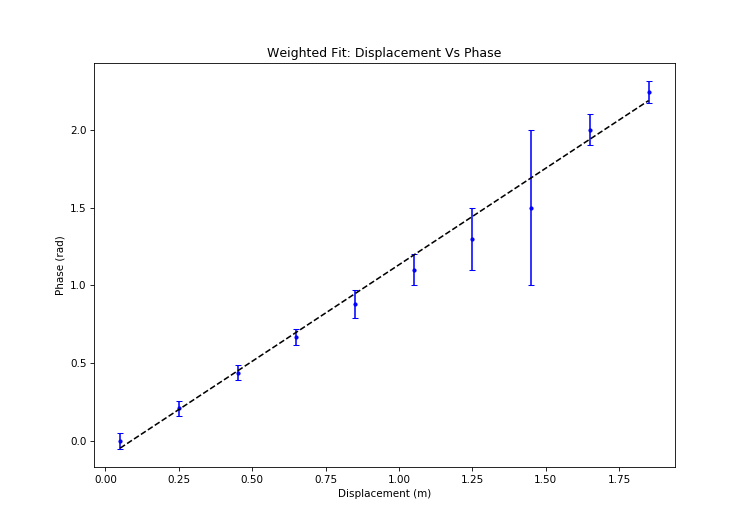

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.set_title('Weighted Fit: Displacement Vs Phase')
y = displacement*gradient + intercept

ax.errorbar(displacement, phase, yerr = phase_error, capsize = 3, capthick = 1, fmt = 'o', color = 'blue', markersize = 3)
ax.errorbar(displacement, y, capsize = 3, capthick = 1, linestyle = '--', color = 'black')

ax.set_ylabel('Phase (rad)')
ax.set_xlabel('Displacement (m)')


plt.show()

## 2. Benford's Law of Anomalous Numbers [10 marks]

It has been observed that the first pages of a table of common logarithms
show more wear than do the last pages, indicating that more used numbers begin
with the digit 1 than with the digit 9. (F. Benford,  *Proceedings of the American Philosophical Society*,
**78**,  March 1938).  The Law can be stated that the probability of obtaining a first digit $a$ is equal to $\log_{10}\left(1+1/a\right)$.

Table 1 shows some of the data sets analysed by Benford.
Choose the ''Population'' row to analyse.


> (i) Use Benford's Law to calculate the probability of obtaining a first digit of $a$, for $1\leq a \leq9$. 
<bf>
> (ii) Using Benford's formula and the total count for the Population group, calculate the expected number of occurrences of the first digit being $a$, $E_{a}$, for $1\leq a \leq9$.  
<bf>
> (iii) Ascertain whether some of the bins should be combined. 
<bf>
> (iv) From the table, and the total count for the Population group, calculate the observed number of occurrences of the first digit being $a$, $O_{a}$, for $1\leq a \leq9$. 
<bf>
> (v)  Calculate $\chi^2$ and the number of degrees of freedom.  
<bf>
> (vi) Test the hypothesis that the distribution for the Population group follows Benford's Law.

\begin{array}{|l|l|c|c|c|c|c|c|c|c|c|c|}
\hline
Group & Title & 1    & 2    & 3    & 4    & 5   & 6   & 7   & 8   & 9 & Count \\ \hline
A                      & Rivers                 & 31.0 & 16.4 & 10.7 & 11.3 & 7.2 & 8.6 & 5.5 & 4.2 & 5.1 & 335                                         \\ \hline
B                      & \textit{Digest}        & 33.4 & 18.5 & 12.4 & 7.5  & 7.1 & 6.5 & 5.5 & 4.9 & 4.2 & 308                                         \\ \hline
C                      & Population             & 33.9 & 20.4 & 14.2 & 8.1  & 7.2 & 6.2 & 4.1 & 3.7 & 2.2 & 3259                                        \\ \hline
D                      & Am. League             & 32.7 & 17.6 & 12.6 & 9.8  & 7.4 & 6.4 & 4.9 & 5.6 & 3.0 & 1458                                        \\ \hline
E                      & Atomic Wt.             & 47.2 & 18.7 & 5.5  & 4.4  & 6.6 & 4.4 & 3.3 & 4.4 & 5.5 & 91                                          \\ \hline
TOTAL                  & TOTAL                  & 30.6 & 18.5 & 12.4 & 9.4  & 8.0 & 6.4 & 5.1 & 4.9 & 4.7 & 20229                                       \\ \hline
\end{array}


Percentage of times the natural numbers 1 to 9 are used as first digits in numbers, as determined by 20,229 observations

# (i)

In [7]:
# this is the data for this exercise
bdata = pd.read_csv('/data/benford.csv')
population = np.array(bdata.loc[2,['1','2','3','4','5','6','7','8','9']], dtype=float)

def probb():
    listt = []
    for i in range(1,10):
        listt.append(np.log10(1+1/i))
        
    return listt

print('Probability list:\n',probb())
print('\nMy Answer -> Probability list (rounded):\n',np.round(probb(),2))

Probability list:
 [0.3010299956639812, 0.17609125905568124, 0.12493873660829992, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]

My Answer -> Probability list (rounded):
 [0.3  0.18 0.12 0.1  0.08 0.07 0.06 0.05 0.05]


# (ii)

In [8]:
count = 3259
expected = []*9

for i in range(0,9):
    expected.append(np.log10(1+1/(i+1))*count)


print('\nExpected Number of occurrences:\n',expected)
print('\nMy Answer -> Expected Number of occurrences (rounded) :\n',np.ndarray.round(np.asarray(expected),2))


Expected Number of occurrences:
 [981.0567558689147, 573.8814132624651, 407.1753426064494, 315.8297323932559, 258.0516808692093, 218.17958740616848, 188.99575520028105, 166.7060706560156, 149.1236617372403]

My Answer -> Expected Number of occurrences (rounded) :
 [981.06 573.88 407.18 315.83 258.05 218.18 189.   166.71 149.12]


# (iii)

In [9]:
print('\nAs all expected number of occurencs are > 5 for all bins then NO bins need to be combined, as stated in the lectures.\n')


As all expected number of occurencs are > 5 for all bins then NO bins need to be combined, as stated in the lectures.



# (iv)

In [10]:
observed = []
for i in range(0,9):
    
    observed.append(round((population[i]/100)*count,0))

print('\nObserved number of occurences (Rounded to integers)\n',observed)


Observed number of occurences (Rounded to integers)
 [1105.0, 665.0, 463.0, 264.0, 235.0, 202.0, 134.0, 121.0, 72.0]


# (v)

In [11]:
one_two_list = []
for i in range(1,10):
    one_two_list.append(i)
    
print('List of As = ',one_two_list)

def chisqfunc():

    
    observed = np.round((population/100)*count)
    
    array = np.log10( ( 1 + 1 / ( np.array(one_two_list) )))
    
    expected = array * count
    
    #print(expected, observed)

    chisq = np.sum( (observed - expected)**2 / expected)

    return chisq

chi = chisqfunc()

print('\nChi squared =', chi)

DOF = 9-1  ### 9 independt data points, 1 param/constraint
print('DOF =', DOF)
print('\nMy Answer -> Rounded values:')
print('Chi squared (round) =', np.round(chi,2))





print('\n\nReduced Chi (round) = ', np.round(chi/DOF,2))

List of As =  [1, 2, 3, 4, 5, 6, 7, 8, 9]

Chi squared = 117.96555667419156
DOF = 8

My Answer -> Rounded values:
Chi squared (round) = 117.97


Reduced Chi (round) =  14.75


# (vi)

In [12]:
print('P value = ', np.round(chi2.sf(chi,8),25))

print('\nThe P value is much much less than 10^-4, therefore the null hypothesis must be rejected. \nTherefore the Population group does NOT follow Benfords Law\nMainly from this and also from the fact that the reduced chi is not roughly = 1 and the minimised chi is not roughly = DOF we must reject the hypothesis.')
print('\nSuggesting either the model is incorrect or the measurements made had some errors assiciated in the process of taking them.')

P value =  8.718e-22

The P value is much much less than 10^-4, therefore the null hypothesis must be rejected. 
Therefore the Population group does NOT follow Benfords Law
Mainly from this and also from the fact that the reduced chi is not roughly = 1 and the minimised chi is not roughly = DOF we must reject the hypothesis.

Suggesting either the model is incorrect or the measurements made had some errors assiciated in the process of taking them.


## 3.  $\chi^2$ minimisation for best-fit parameters [10 marks]

Some  students measure the  dependence of the  period, $T$, on the  initial angular displacement, $\theta$, of a pendulum and obtain the following results:
\begin{array}{lcccccc}
\hline
\theta {\rm (rad)} &0.100&0.201&0.305&0.412&0.524&0.644\\
T {\rm  (s)} &1.985&1.990&1.995&2.017&2.026&2.045\\
{\rm error (s)}   &0.005&0.004&0.005&0.004&0.005&0.006\\
\hline
\end{array} 

They model the data with the equation $\displaystyle{T=T_0\left[1\,+\,\alpha\,\theta^2\right]}$, where $T_0$ and $\alpha$ are parameters to be determined.


Perform a $\chi^2$ minimisation.
> (i) What are  the  best-fit parameters?
<bf>
> (ii) How many degrees of freedom are there?
<bf>
> (iii) What is the value of $\chi^2_{\rm min}$?
<bf>
> (iv) What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?
<bf>
> (v) Comment on the agreement with  the theoretical prediction of $\alpha^{-1}=16$.

# (i)

In [13]:
# this is the data for this exercise
pdata = pd.read_csv('/data/pendulum.csv')
pdata
theta = np.array(pdata.iloc[:,0])
t = np.array(pdata.iloc[:,1])
t_error = np.array(pdata.iloc[:,2])

def chisqfunc(x):
    'Linear chi squared fitting function'
    t_0, alpha = x
    model = t_0*(1 + alpha*theta**2)
    chisq = np.sum(((t - model)/t_error)**2)
    return chisq


# Set starting position from which to minimize
x0 = np.array([0,0])

# Use scipy.optimize.minimize
result =  minimize(chisqfunc, x0)
t_0, alpha = result.x
t_0_error = np.sqrt(2*result.hess_inv[0][0]) #In the book it says I need to account for factor of 2 
alpha_error = np.sqrt(2*result.hess_inv[1][1])



print('Note: Did not include units as units of T0 and alpha are not defined \n(I did not want to assume anything but if I had to:\n T0 in units of [s] and alpha in units of [rad^-2]\n')
print('T0 = ',t_0,
      '\nT0 error = ',t_0_error,
      '\nAlpha = ', alpha,
      '\nAlpha error = ',alpha_error)

print('\nMy Answer -> Rounded values :',
      '\n\nT0 = ',np.round(t_0,3),
      '\nT0 error = ',np.round(t_0_error,3),
      '\nAlpha = ', np.round(alpha,3),
      '\nAlpha error = ',np.round(alpha_error,3))

Note: Did not include units as units of T0 and alpha are not defined 
(I did not want to assume anything but if I had to:
 T0 in units of [s] and alpha in units of [rad^-2]

T0 =  1.9846616280434466 
T0 error =  0.0029430647281693412 
Alpha =  0.07745123601521749 
Alpha error =  0.007824559298369452

My Answer -> Rounded values : 

T0 =  1.985 
T0 error =  0.003 
Alpha =  0.077 
Alpha error =  0.008


# (ii)

In [14]:
DOF = 6 - 2
print('DOF = ',DOF)

DOF =  4


# (iii)

In [15]:


def chisqfunc(t,t_error,theta, t_0, alpha):
    'Linear chi squared fitting function'
    
    model = t_0*(1 + alpha*theta**2)
    chisq = np.sum(((t - model)/t_error)**2)
    return chisq

print('Chi min = ',chisqfunc(t,t_error,theta, t_0, alpha))

print('\n\nChi min (rounded) = ', np.round(chisqfunc(t,t_error,theta, t_0, alpha),2))

print('\nReduced Chi (rounded) = ', np.round(chisqfunc(t,t_error,theta, t_0, alpha)/DOF,1))

Chi min =  3.5246502488950986


Chi min (rounded) =  3.52

Reduced Chi (rounded) =  0.9


# (iv)

In [16]:
print('P value = ',chi2.sf( chisqfunc(t,t_error,theta, t_0, alpha) ,DOF))

print('\nP value (round) = ', np.round(chi2.sf( chisqfunc(t,t_error,theta, t_0, alpha) ,DOF),1))

P value =  0.4741401324141523

P value (round) =  0.5


# (v)

In [17]:
error_alpha_inv = abs( ( 1 / (alpha+alpha_error) ) -  1/(alpha) )

print('Note: Assuming units of alpha^-1 = [rad^2]',
    '\nAlpha^-1 = ', np.round(1/alpha,1),
     '\nError on Alpha^-1 = ', np.round(error_alpha_inv,1),
     '\nUpper range of Alpha^-1 = ', np.round(1/alpha + error_alpha_inv,1))

print('\n\nAlthough our p value is reasonable suggesting a reasonable fit, suggetsing our hypothesis is to some degree "correct". And that our reduced chi value is roughly equal to 1 suggests it is a reasonable fit. \
 The value of alpha we obtain with its respective error is not in agreement with the theoretical prediction. I.e alpha = 16 is not within our value plus or minus its errors. \
 This could suggest there are some underling errors in our measurements or errors. This is very unlikely but it could also possibly suggest the theoretical value is incorrect. To obtain a more accurate result more data is needed.')

Note: Assuming units of alpha^-1 = [rad^2] 
Alpha^-1 =  12.9 
Error on Alpha^-1 =  1.2 
Upper range of Alpha^-1 =  14.1


Although our p value is reasonable suggesting a reasonable fit, suggetsing our hypothesis is to some degree "correct". And that our reduced chi value is roughly equal to 1 suggests it is a reasonable fit.  The value of alpha we obtain with its respective error is not in agreement with the theoretical prediction. I.e alpha = 16 is not within our value plus or minus its errors.  This could suggest there are some underling errors in our measurements or errors. This is very unlikely but it could also possibly suggest the theoretical value is incorrect. To obtain a more accurate result more data is needed.


# Plot

<IPython.core.display.Javascript object>


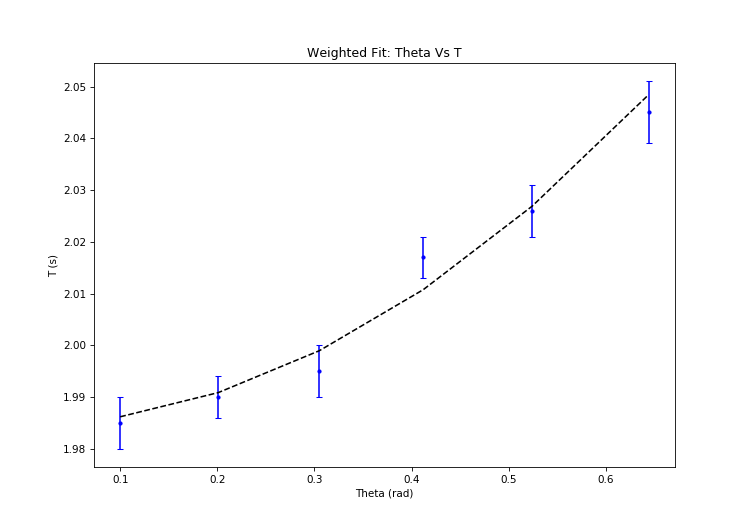

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.set_title('Weighted Fit: Theta Vs T')

y = t_0*(1 + alpha*theta**2)
ax.errorbar(theta, t, yerr = t_error, capsize = 3, capthick = 1, fmt = 'o', color = 'blue', markersize = 3)
ax.errorbar(theta,y, capsize = 3, capthick = 1, linestyle = '--', color = 'black')

ax.set_ylabel('T (s)')
ax.set_xlabel('Theta (rad)')

plt.show()

## 4. Analysing radioactive decay [10 marks]

In this question we shall  analyse  data from a radioactive decay experiment. The data is stored in the file `RadioaticeData.csv` and can be loaded using the following cell.

In [19]:
# this is the data for this exercise
rdata = pd.read_csv('/data/RadioactiveData.csv')
rdata

,Time in secs,Rate per sec
0,12.0,51.0
1,24.1,50.7
2,36.1,48.0
3,48.1,39.3
4,60.1,43.9
5,72.2,40.6
6,84.2,40.0
7,96.2,34.8
8,108.2,32.0
9,120.3,33.8


There are two columns: time, and activity (count rate).

The experiment involves measuring the activity of the radioisotope $^{137}$Ba  as a function of time by
detecting the gamma rays that are emitted. The activity is calculated by dividing the total number of decays in a 12-second interval by 12.


The model to describe the data has three  parameters:  an initial activity $A_0$, a decay time, $\tau$, and a background rate $A_{\rm bgd}$. Mathematically, we can represent the decay by the fitting function:
\begin{equation}
A(t)=A_0 \exp(-t/\tau)+A_{\rm bgd}.
\end{equation}

>(i) What are the count errors?  \[Hint: radioactive decay is known to follow Poisson statistics\]
Perform a $\chi^2$ minimisation.
<bf>
> (ii) What are  the  best-fit parameters?
<bf>
> (iii) What is the reduced $\chi^2$ value?
<bf>
> (iv) The half-life $t_{1/2}$ is realted to $\tau$ via the realtionship $t_{1/2}=\ln(2)\tau$.  From your fit what is the half-life of $^{137}$Ba?
<bf>
> (v) The tabulated half-life  of $^{137}$Ba is 153 s.  Comment on the agreement with the value you obtained.

In [20]:
time = np.array(rdata.iloc[:,0])
counts = np.array(rdata.iloc[:,1])

# (i)

In [21]:
error_counts = np.sqrt(counts*12) / 12
"""
I.e B = total counts
then A = B/12
so alpha_A = SQRT(B)/12 = SQRT(12*A)/12
"""
print('My Answer -> Count errors = \n',error_counts)


My Answer -> Count errors = 
 [2.06155281 2.05548048 2.         1.80969611 1.91267701 1.83938395
 1.82574186 1.70293864 1.63299316 1.67829278 1.65327957 1.60208198
 1.52752523 1.42302495 1.52206001 1.363207   1.39940464 1.31972219
 1.34783777 1.23153021 1.17615192 1.22133806 1.17968922 1.10679718
 1.10679718 1.10302614 1.06066017 1.0567245  1.01242284 1.03279556
 0.90829511 0.90369611 0.8850612  0.8660254  0.8660254  0.91287093
 0.82663978 0.85146932 0.74721706 0.73598007 0.70710678 0.69522179
 0.69522179 0.65828059 0.63900965 0.71297499 0.5845226  0.67082039
 0.63900965 0.59160798 0.65828059 0.57008771 0.56273143 0.55527771
 0.5986095  0.56273143 0.48304589 0.52440442 0.51639778 0.48304589
 0.46547467 0.5       ]


In [22]:
def chisqfunc(x):
    'Linear chi squared fitting function'
    A_0,tau, A_bgd = x
    model = A_0 * np.exp(-time/tau) + A_bgd
    chisq = np.sum(((counts - model)/error_counts)**2)
    return chisq


# Set starting position from which to minimize
x0 = np.array([54.3, 221, 0.8])

# Use scipy.optimize.minimize
result =  minimize(chisqfunc, x0)
A_0,tau, A_bgd = result.x

A_0_error = np.sqrt(2*result.hess_inv[0][0]) #In the book it says I need to account for factor of 2 
tau_error = np.sqrt(2*result.hess_inv[1][1])
A_bgd_error = np.sqrt(2*result.hess_inv[2][2])

print('Best fit params:',
     '\nA_0 = ',A_0 ,'Rate per sec' ,
     '\ntau = ', tau,'s',
     '\nA_bgd = ', A_bgd  ,'Rate per sec' ,
     '\nA_0_error = ',  A_0_error,'Rate per sec' ,
     '\ntau_error = ', tau_error,'s',
      '\nA_bgd_error = ',A_bgd_error,'Rate per sec' ,
     )

print('\nMy Answer -> Best fit params (rounded):',
     '\n\nA_0 = ',np.round(A_0,1) , 'Rate per sec',
     '\ntau = ', np.round(tau,1), 's',
     '\nA_bgd = ', np.round(A_bgd,1)  , 'Rate per sec' ,
     '\nA_0_error = ',  np.round(A_0_error,1),'Rate per sec',
     '\ntau_error = ', np.round(tau_error,1),'s',
      '\nA_bgd_error = ',np.round(A_bgd_error,1),'Rate per sec'
     )

def chisqfun(counts, time, A_0, tau, A_bgd):
    'Linear chi squared fitting function'
    
    model = A_0 * np.exp(-time/tau) + A_bgd
    chisq = np.sum(((counts - model)/error_counts)**2)
    return chisq

print('\nChi min = ',chisqfun(counts, time, A_0, tau, A_bgd))

print('\nChi min (rounded) = ', np.round(chisqfun(counts, time, A_0, tau, A_bgd),1))

Best fit params: 
A_0 =  54.31172474265925 Rate per sec 
tau =  221.05693148195175 s 
A_bgd =  0.8219430275324732 Rate per sec 
A_0_error =  0.8423100797322001 Rate per sec 
tau_error =  6.451607962170126 s 
A_bgd_error =  0.3008129183843208 Rate per sec

My Answer -> Best fit params (rounded): 

A_0 =  54.3 Rate per sec 
tau =  221.1 s 
A_bgd =  0.8 Rate per sec 
A_0_error =  0.8 Rate per sec 
tau_error =  6.5 s 
A_bgd_error =  0.3 Rate per sec

Chi min =  53.522842770962285

Chi min (rounded) =  53.5


# (ii)

In [23]:
print('Best fit params:',
     '\nA_0 = ',A_0 ,'Rate per sec' ,
     '\ntau = ', tau,'s',
     '\nA_bgd = ', A_bgd  ,'Rate per sec' ,
     '\nA_0_error = ',  A_0_error,'Rate per sec' ,
     '\ntau_error = ', tau_error,'s',
      '\nA_bgd_error = ',A_bgd_error,'Rate per sec' ,
     )

print('\nMy Answer -> Best fit params (rounded):',
     '\n\nA_0 = ',np.round(A_0,1) , 'Rate per sec',
     '\ntau = ', np.round(tau,0), 's',
     '\nA_bgd = ', np.round(A_bgd,1)  , 'Rate per sec' ,
     '\nA_0_error = ',  np.round(A_0_error,1),'Rate per sec',
     '\ntau_error = ', np.round(tau_error,0),'s',
      '\nA_bgd_error = ',np.round(A_bgd_error,1),'Rate per sec'
     )

Best fit params: 
A_0 =  54.31172474265925 Rate per sec 
tau =  221.05693148195175 s 
A_bgd =  0.8219430275324732 Rate per sec 
A_0_error =  0.8423100797322001 Rate per sec 
tau_error =  6.451607962170126 s 
A_bgd_error =  0.3008129183843208 Rate per sec

My Answer -> Best fit params (rounded): 

A_0 =  54.3 Rate per sec 
tau =  221.0 s 
A_bgd =  0.8 Rate per sec 
A_0_error =  0.8 Rate per sec 
tau_error =  6.0 s 
A_bgd_error =  0.3 Rate per sec


# (iii)

In [24]:


def chisqfun(counts, time, A_0, tau, A_bgd):
    'Linear chi squared fitting function'
    
    model = A_0 * np.exp(-time/tau) + A_bgd
    chisq = np.sum(((counts - model)/error_counts)**2)
    return chisq

print('Chi min = ',chisqfun(counts, time, A_0, tau, A_bgd))

DOF = 62 - 3

print('\nReduced Chi = ', chisqfun(counts, time, A_0, tau, A_bgd)/DOF)

print('\nMy Answer -> Rounded values:')

print('\nChi min = ', np.round(chisqfun(counts, time, A_0, tau, A_bgd),1))


print('\nReduced Chi = ', np.round(chisqfun(counts, time, A_0, tau, A_bgd)/DOF,1))

Chi min =  53.522842770962285

Reduced Chi =  0.9071668266264794

My Answer -> Rounded values:

Chi min =  53.5

Reduced Chi =  0.9


# (iv)

In [25]:
print('Half life = ', np.log(2)*tau , 's')
error = abs(np.log(2)*(tau + tau_error) -  np.log(2)*tau)

Tau_upper = np.log(2)*tau + error
Tau_lower = np.log(2)*tau - error

print('Error on halflife = ', error)
print('\nUpper & lower values of Tau (due to errors) =',Tau_upper,'s ', Tau_lower,'s')


print('\nMy Answer -> Rounded values :')

print('\nError on halflife = ', np.round(error,1))

print('\nHalf life = ', np.round(np.log(2)*tau,1),' s')


print('\nUpper & lower values of Tau (due to errors) =', np.round(Tau_upper,1),'s & ', np.round(Tau_lower,1),'s')

Half life =  153.22498879994785 s
Error on halflife =  4.471913869056323

Upper & lower values of Tau (due to errors) = 157.69690266900417 s  148.75307493089153 s

My Answer -> Rounded values :

Error on halflife =  4.5

Half life =  153.2  s

Upper & lower values of Tau (due to errors) = 157.7 s &  148.8 s


# (v)

In [26]:
error = abs(np.log(2)*(tau + tau_error) -  np.log(2)*tau)

Tau_upper = np.log(2)*tau + error
Tau_lower = np.log(2)*tau - error

print('Upper & lower values of Tau (due to errors) =', np.round(Tau_upper,1),'s  & ', np.round(Tau_lower,1),'s')
print('\nP value = ',np.round(chi2.sf( chisqfun(counts, time, A_0, tau, A_bgd) ,DOF),2))
print('\nChi min = ',np.round(chisqfun(counts, time, A_0, tau, A_bgd),1))
print('\nDOF = ',DOF)
print('\nReduced Chi = ', np.round(chisqfun(counts, time, A_0, tau, A_bgd)/DOF,2))
#The tabulated half-life of  137137 Ba is 153 s. Comment on the agreement with the value you obtained.
print('\nFirstly, the tabulated half-life of 137 Ba is in agreement with the value we obtained as it is in the range of our value when you include the errors, so it is in agreement. Secondly, the p value is in the area of 0.5 therefore our model is a reasonable fit so we dont reject our hypothesis. Thirdly the Chi min is roughly = DOF so according to the lectures it is in good agreement. Lastly our reduced chi is very close to 1 which again suggests a reasonable fit.')

print('\nFrom all of this information I would conclude the value we obtained for the half life is in agreement with the tabulated value of 137 Ba of 153s')

Upper & lower values of Tau (due to errors) = 157.7 s  &  148.8 s

P value =  0.68

Chi min =  53.5

DOF =  59

Reduced Chi =  0.91

Firstly, the tabulated half-life of 137 Ba is in agreement with the value we obtained as it is in the range of our value when you include the errors, so it is in agreement. Secondly, the p value is in the area of 0.5 therefore our model is a reasonable fit so we dont reject our hypothesis. Thirdly the Chi min is roughly = DOF so according to the lectures it is in good agreement. Lastly our reduced chi is very close to 1 which again suggests a reasonable fit.

From all of this information I would conclude the value we obtained for the half life is in agreement with the tabulated value of 137 Ba of 153s


# Plot

<IPython.core.display.Javascript object>


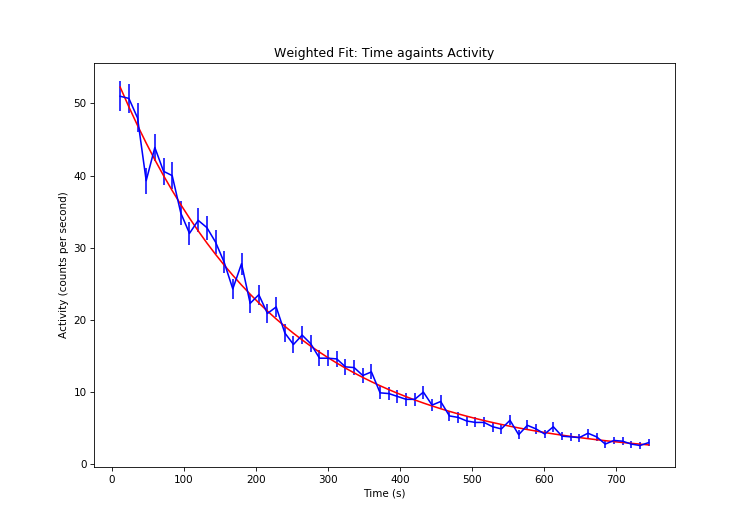

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.set_title('Weighted Fit: Time againts Activity')



expected = A_0*np.exp(-time/tau) + A_bgd

ax.errorbar(time, counts,yerr = error_counts ,color = 'blue')
ax.plot(time,expected, color = 'red')


ax.set_ylabel('Activity (counts per second)')
ax.set_xlabel('Time (s)')

plt.show()